## fichier final (Laurent)

In [1]:
import re
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import  train_test_split

In [2]:
'''importation du df'''
df = pd.read_csv(r'C:\Users\Qw\Desktop\projet_gaming\vgsales_complet.csv')


'''comparer les nom des jeux et supprimer ceux qui ne sont pas égaux (metacritic et cg_sales)'''
    #comparer les noms des jeux
samegame=[]
for i, j in zip(df['Name'],df['gamename']):
    if i in j or j in i:
        samegame.append(1)
    else:
        samegame.append(0)
df['same_game']=samegame 
    # supprimer les jeux non compatible avec vg_salles
df.drop(df[df['same_game']==0].index, inplace=True)    
    
    
    
'''recupération des données : '''
    # extraire les données de la colonne userscorewrap pour corriger les erreurs de
    #la colonne ratings et nb_votes
y=[]
for i in df['userscorewrap']:
    x = re.findall(r'[0-9\.0-9]+',i)
    y.append(x)
df['userscorewrap2']=y
    # remplacer les listes vides ou avec une seul valeur par [0,0] afin d'éviter l'erreur de "length..."
for i in df['userscorewrap2']:
    if i==[]:
        i.append(0)
        i.append(0)
    if len(i)==1:
        i.clear()
        i.append(0)
        i.append(0)
    # extraire les données de la colonne metascorewrap pour corriger les erreurs de
    #la colonne metascore et nb_critic
n=[]
for i in df['metascorewrap']:
    x = re.findall(r'[0-9\.0-9]+',i)
    n.append(x)
df['metascorewrap2']=n
    # remplacer les listes vides ou avec une seul valeur par [0,0] afin d'éviter l'erreur de "length..."
for i in df['metascorewrap2']:
    if i==[]:
        i.append(0)
        i.append(0)
    if len(i)==1:
        i.clear()
        i.append(0)
        i.append(0)
    # recuperer les données de la colonnes metascorewrap2 et userscorewrap2
x=[]
y=[]
for i in df['userscorewrap2']:
    x.append(i[0])
    y.append(i[1])
df['ratings']=x
df['nb_votes']=y

x=[]
y=[]
for i in df['metascorewrap2']:
    x.append(i[0])
    y.append(i[1])
df['metascore']=x
df['nb_critic']=y


'''correction des erreurs : '''
    # remplacer les nan de la colonne year par 0 et la convertir en int
df['Year']=df['Year'].replace(np.nan, 0)
df['Year']=df['Year'].astype(int)
    # remplacer les nan de la colonne year par 0 et la convertir en int
df['Publisher']=df['Publisher'].replace(np.nan, 'not found')
    # convertir les types des colonnes:
df['ratings']=df['ratings'].astype(float)
df['nb_votes']=df['nb_votes'].astype(int)
df['metascore']=df['metascore'].astype(int)
df['nb_critic']=df['nb_critic'].astype(int)



        
'''supprimer les colonnes dont on a plus besoin:'''
df.drop(['top','metascorewrap','userscorewrap','nbvotes','nbratings', 'description',
        'gamename','same_game','userscorewrap2','metascorewrap2'], axis=1, inplace=True)



'''reorganisation df '''
df = df[['Rank', 'Name', 'Genre', 'Year','developper','Publisher','Platform','NA_Sales',
      'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales','ratings','nb_votes', 'metascore'
         ,'nb_critic']] 

'''renomer les colonnes'''
df = df.rename(columns = {'ratings':'userNote','nb_votes':'userNbVote','metascore':'metaNote','nb_critic':'metaNbVote'})

df.head()

,Rank,Name,Genre,Year,developper,Publisher,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,userNote,userNbVote,metaNote,metaNbVote
0,1,Wii Sports,Sports,2006,Nintendo,Nintendo,Wii,41.49,29.02,3.77,8.46,82.74,8.1,453,76,51
1,2,Super Mario Bros.,Platform,1985,Nintendo,Nintendo,NES,29.08,3.58,6.81,0.77,40.24,8.5,98,84,14
2,3,Mario Kart Wii,Racing,2008,Nintendo,Nintendo,Wii,15.85,12.88,3.79,3.31,35.82,8.4,1047,82,73
3,4,Wii Sports Resort,Sports,2009,Nintendo,Nintendo,Wii,15.75,11.01,3.28,2.96,33.00,8.2,293,80,73
5,6,Tetris,Puzzle,1989,Nintendo,Nintendo,GB,23.20,2.26,4.22,0.58,30.26,8.2,258,83,27


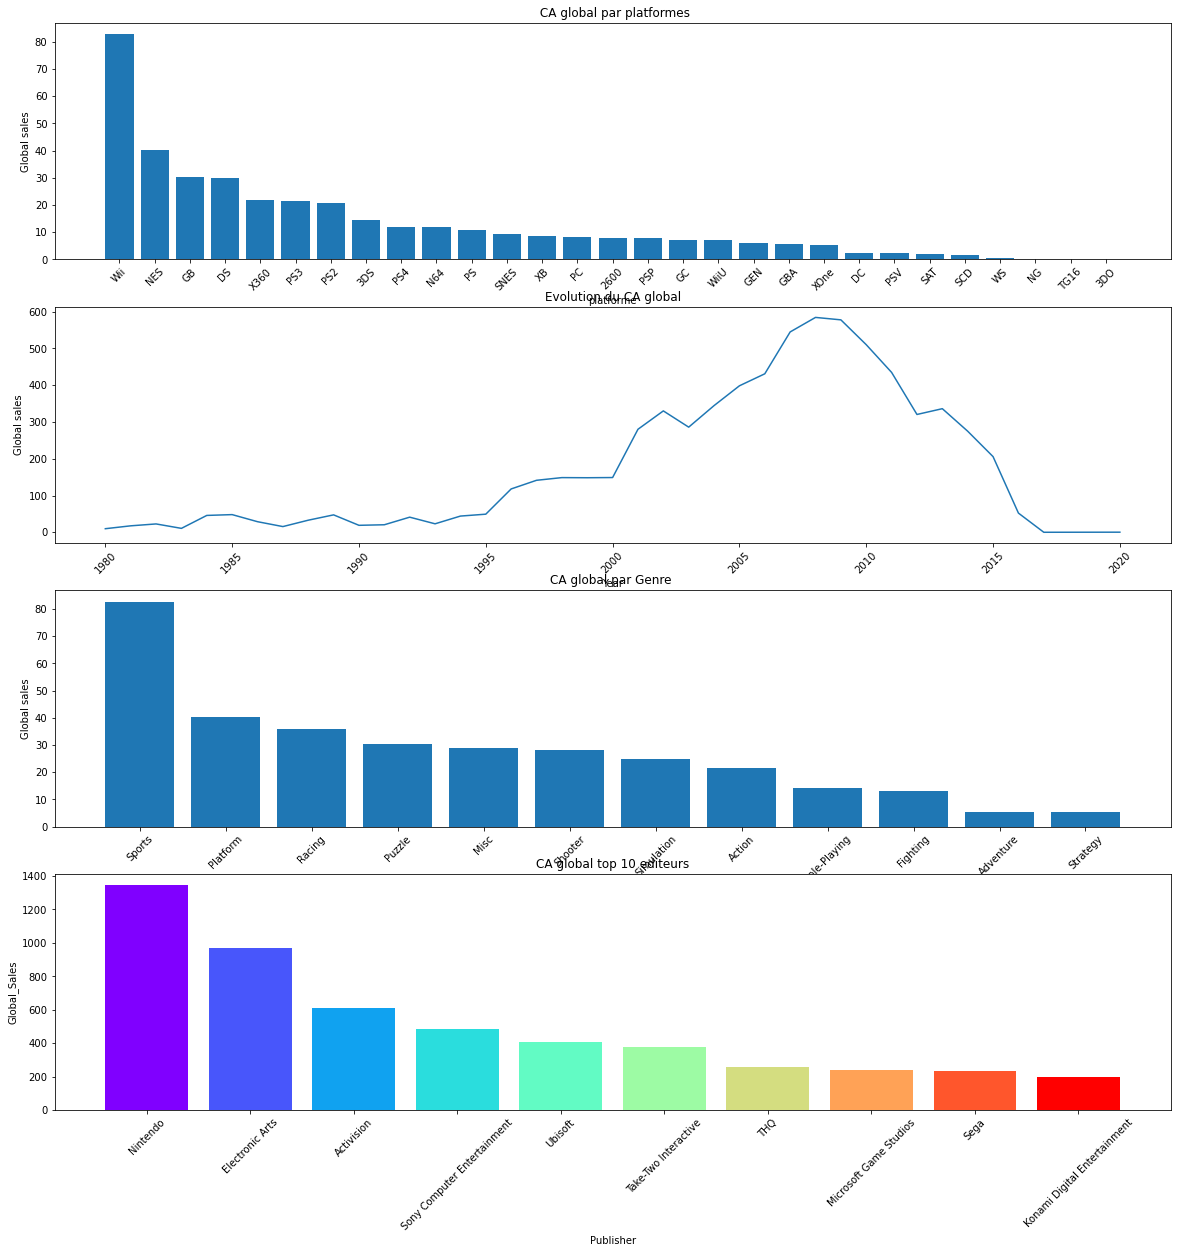

In [6]:
# CA par platforme: platforme la plus utilisée
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
plt.bar(df['Platform'], df['Global_Sales'])
plt.xlabel('platforme')
plt.ylabel('Global sales')
plt.xticks(rotation = '45')
plt.title(' CA global par platformes');

plt.subplot(4,1,2)
df_group=df.groupby('Year',as_index = False).agg({'Global_Sales':'sum'})
df_ca = df_group[df_group['Year']>1800]
plt.plot(df_ca['Year'], df_ca['Global_Sales'])
plt.xlabel('Year')
plt.ylabel('Global sales')
plt.xticks(rotation = '45')
plt.title('Evolution du CA global');

plt.subplot(4,1,3)
plt.bar(df['Genre'], df['Global_Sales'])
plt.xlabel('Genre')
plt.ylabel('Global sales')
plt.xticks(rotation = '45')
plt.title('CA global par Genre ');

plt.subplot(4,1,4)
df_group2=df.groupby('Publisher',as_index = False).agg({'Global_Sales':'sum'})
top10 = df_group2.sort_values('Global_Sales', ascending = False).head(10)
plt.bar(top10['Publisher'], top10['Global_Sales'],color = cm.rainbow(np.linspace(0, 1, len(top10))))
plt.xlabel('Publisher')
plt.ylabel('Global_Sales')
plt.xticks(rotation = '45')
plt.title("CA global top 10 editeurs");


In [ ]:
#df.Publisher.value_counts()
#df[df['Rank']==466]
#df[df['userNote']=='tbd']
#df[df['metaNote']=='not found']
#df.head()
#df.isnull().sum()
#df.info()